In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
#Function to visualize the mean price by state in a bar chart
def mean_price_by_state(dataframe):
    # Calculate mean price per state and plot
    mean_price_by_state = dataframe.groupby("state")["price__millions"].mean().sort_values(ascending = False).plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Price in Millions [NGN]",
    title = f"Mean Price Distribution By State for {dataframe['title'].unique()[0]}"
    );
    return dataframe

In [3]:
#Function to visualize the price distribution in a histogram
def price_distribution(dataframe):
    plt.hist(dataframe["price__millions"]);
    plt.xlabel("Price in Millions [NGN]",)
    plt.ylabel("Frequency",)
    plt.title(f"Mean Price Distribution in Millions [NGN] for {dataframe['title'].unique()[0]}")
    plt.show()
    return dataframe

In [4]:
#Function to visualize the mean price by town in a bar chart
def mean_price_by_town(dataframe):
    
    # Calculate the mean price per Town
    mean_price_by_town = dataframe.groupby('town')['price__millions'].mean().sort_values(ascending=False)
    
    # Select the towns where the mean price is greater than or equal to 250
    mean_price_above_250 = mean_price_by_town[mean_price_by_town >= 250]

    # Set the figure size
    plt.figure(figsize=(12, 8))
    #Plot
    mean_price_above_250.plot(
        
    kind = "bar",
    xlabel = "Town",
    ylabel = "Price in Millions [NGN]",
    title = f"Mean Price By Town (greater than or equals to 250, 000, 000 NGN) for {dataframe['title'].unique()[0]}"
    );
    return dataframe

In [5]:
def correl(dataframe):
    dfint = dataframe.select_dtypes(include= "float64")
    correla = dfint.corr()
    
    #Explain Correlation
    print(f"Note: If the correlation between two columns/features in The {dataframe['title'].unique()[0]} Dataset is less than 0.5,")
    print("there is a weak correlation between the two columns.")
    
    return correla

In [6]:
def correlHeatMap(dataframe):
    
    sns.heatmap(correla);
    print("NOTE: The lighter the color, the higher the correlation between two corresponding columns")
    plt.title(f"The Correlation Between The Columns in The {dataframe['title'].unique()[0]} Dataset");
    
    return

In [7]:
#load the dataset into a data frame
df = pd.read_csv("nigeria_houses_data.csv")

#convert the price in NGN to millions of NGN
df["price__millions"] = df["price"]/1e6

# Filter rows where the price is greater than or equal to 200 OR less than 1000 million NGN
k = range(250, 1001)
mask_price = df["price__millions"].isin(k)

# Filter rows with certain apartment type
mask_aptType = df["title"].isin(["Detached Duplex", "Terraced Duplexes", "Semi Detached Duplex", "Detached Bungalow"])

#Drop all rows with Anambra State
maskState = df["state"] != "Anambara"

# Apply filters: price, apartment type, and states
df = df[mask_price & mask_aptType & maskState]

#drop unnecessary columns
df.drop(columns = ["price"], inplace = True)

#Show the first 5 rows
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price__millions
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450.0
14,6.0,6.0,7.0,4.0,Detached Duplex,Victoria Island (VI),Lagos,450.0
25,5.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,270.0


In [8]:
#Print the unique apartment types in our dataset
df["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow'], dtype=object)

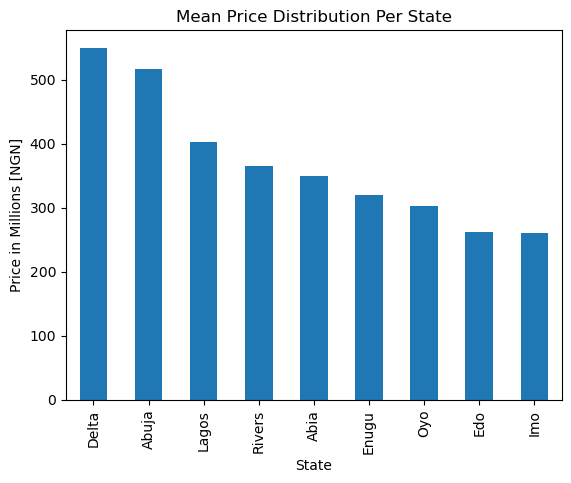

In [9]:
#Visualize the Mean Price Distribution Per State in our dataset
df.groupby("state")["price__millions"].mean().sort_values(ascending = False).plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Price in Millions [NGN]",
    title = "Mean Price Distribution Per State"
);

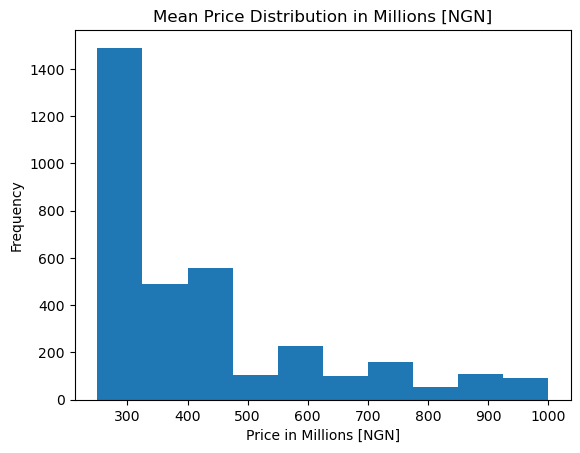

In [10]:
#Visualize the Mean Price Distribution in Millions [NGN] in our dataset
plt.hist(df["price__millions"]);
plt.xlabel("Price in Millions [NGN]",)
plt.ylabel("Frequency",)
plt.title("Mean Price Distribution in Millions [NGN]")
plt.show()

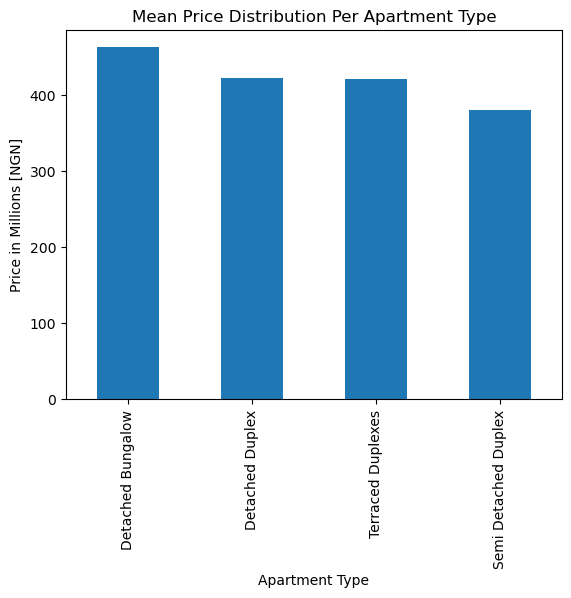

In [11]:
#Visualize the Mean Price Distribution Per Apartment Type in our dataset
df.groupby("title")["price__millions"].mean().sort_values(ascending = False).plot(
    kind = "bar",
    xlabel = "Apartment Type",
    ylabel = "Price in Millions [NGN]",
    title = "Mean Price Distribution Per Apartment Type"
);

In [12]:
#Calculate the correlation for all integer/float columns in our dataset
dfght = df.select_dtypes(include= "float64")
print("Note: If the correlation between two columns/features in The Nigeria Houses Dataset is less than 0.5, "
      "\nthere is a weak correlation between the two columns.")
correla = dfght.corr()
correla

Note: If the correlation between two columns/features in The Nigeria Houses Dataset is less than 0.5, 
there is a weak correlation between the two columns.


,bedrooms,bathrooms,toilets,parking_space,price__millions
bedrooms,1.000000,0.558963,0.291621,-0.010248,0.152759
bathrooms,0.558963,1.000000,0.632430,0.072277,0.070139
toilets,0.291621,0.632430,1.000000,0.143902,-0.007867
parking_space,-0.010248,0.072277,0.143902,1.000000,-0.073978
price__millions,0.152759,0.070139,-0.007867,-0.073978,1.000000


NOTE: The lighter the color, the higher the correlation between the two corresponding columns


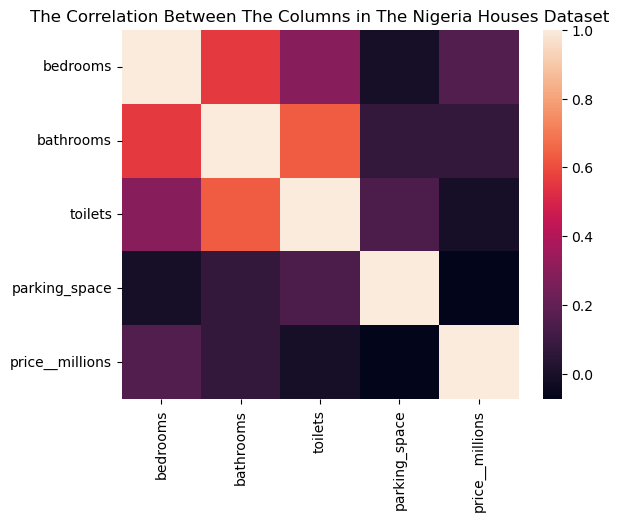

In [13]:
#Visualize the Correlation Between The Columns In The Nigeria Houses Dataset
sns.heatmap(correla)
print("NOTE: The lighter the color, the higher the correlation between the two corresponding columns")
plt.title("The Correlation Between The Columns in The Nigeria Houses Dataset");

In [14]:
#Extract Detached Duplex data set into a Data Frame
DD = df[df["title"] == "Detached Duplex"]

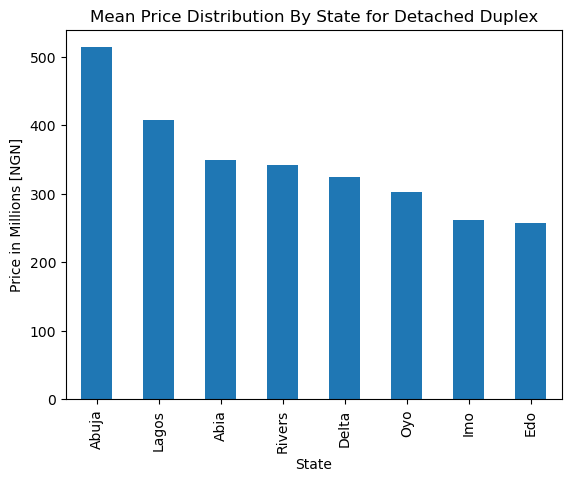

In [15]:
#Visualize the mean price per state for Detached Duplex
mean_price_by_state(DD);

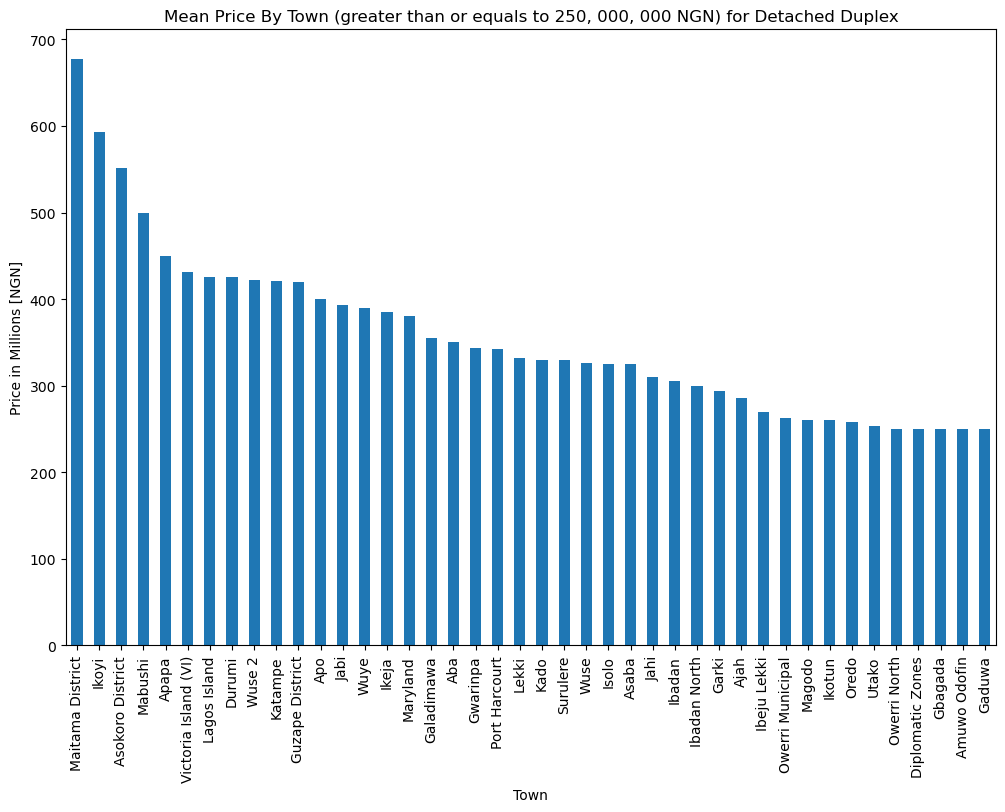

In [16]:
#Visualize the mean price per town for Detached Duplex
mean_price_by_town(DD);

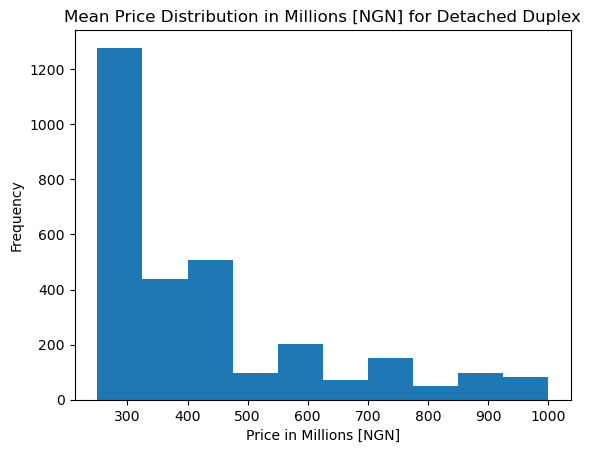

In [17]:
#Visualize the mean price frequency for Detached Duplex
price_distribution(DD);

In [18]:
#Calculate the correlation between columns in the Detached Duplex dataset
correl(DD)

Note: If the correlation between two columns/features in The Detached Duplex Dataset is less than 0.5,
there is a weak correlation between the two columns.


,bedrooms,bathrooms,toilets,parking_space,price__millions
bedrooms,1.000000,0.513493,0.230594,-0.054976,0.165609
bathrooms,0.513493,1.000000,0.619125,0.041719,0.069721
toilets,0.230594,0.619125,1.000000,0.116535,-0.002587
parking_space,-0.054976,0.041719,0.116535,1.000000,-0.078843
price__millions,0.165609,0.069721,-0.002587,-0.078843,1.000000


NOTE: The lighter the color, the higher the correlation between two corresponding columns


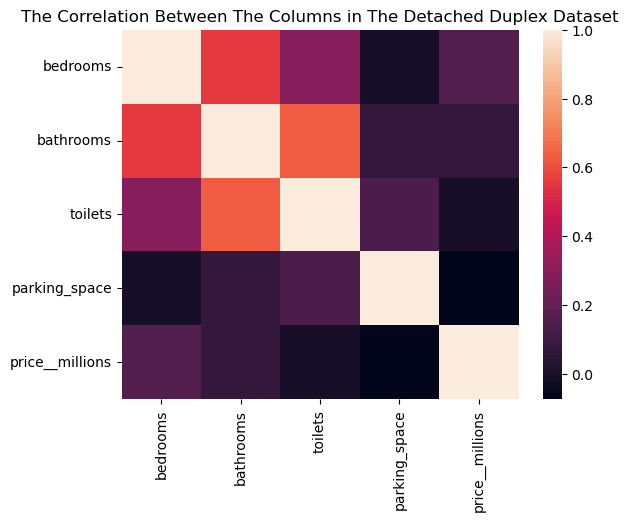

In [19]:
#Visualize the correlation between columns in the Detached Duplex dataset
correlHeatMap(DD)

In [20]:
#Extract Terraced Duplexes data set into a Data Frame
TD = df[df["title"] == "Terraced Duplexes"]

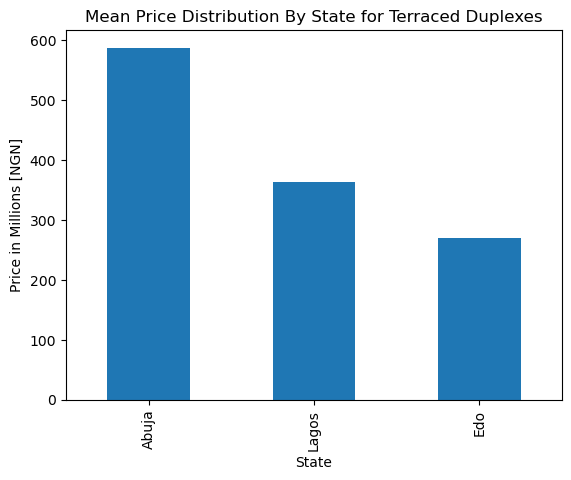

In [21]:
#Visualize the mean price per state for Terraced Duplexes
mean_price_by_state(TD);

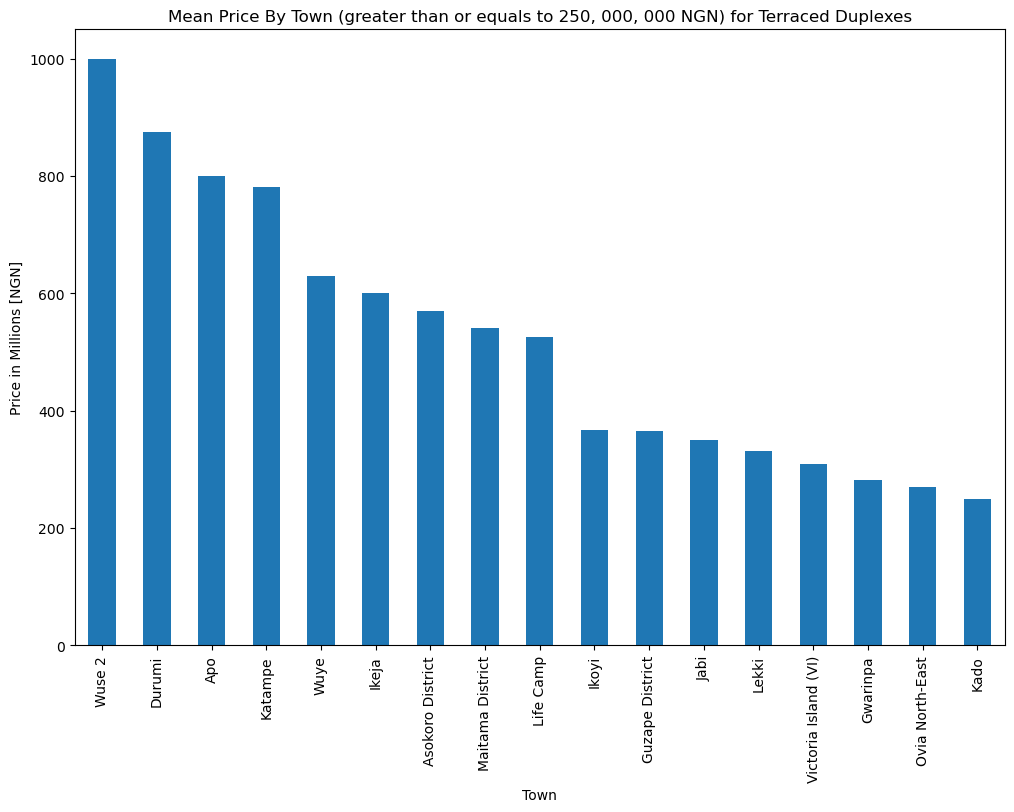

In [22]:
#Visualize the mean price per town for Terraced Duplexes
mean_price_by_town(TD);

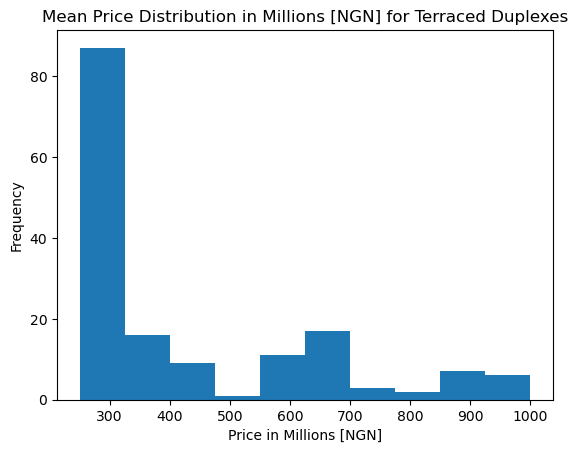

In [23]:
#Visualize the mean price distribution for Terraced Duplexes
price_distribution(TD);

In [24]:
#Calculate the correlation between columns in the Terraced Duplex dataset
correl(TD)

Note: If the correlation between two columns/features in The Terraced Duplexes Dataset is less than 0.5,
there is a weak correlation between the two columns.


,bedrooms,bathrooms,toilets,parking_space,price__millions
bedrooms,1.000000,0.737732,0.787608,0.339454,-0.037320
bathrooms,0.737732,1.000000,0.791349,0.349087,0.081220
toilets,0.787608,0.791349,1.000000,0.356332,-0.027803
parking_space,0.339454,0.349087,0.356332,1.000000,0.044578
price__millions,-0.037320,0.081220,-0.027803,0.044578,1.000000


NOTE: The lighter the color, the higher the correlation between two corresponding columns


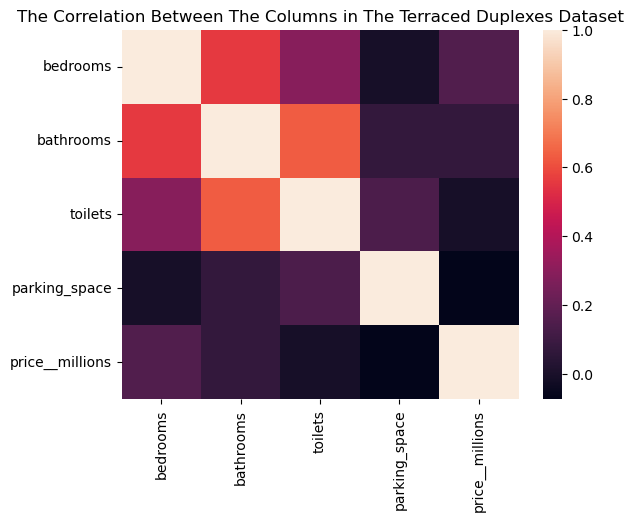

In [25]:
#Visualize the correlation between columns in the Terraced Duplex dataset
correlHeatMap(TD)

In [26]:
#Extract Semi Detached Duplex data set into a Data Frame
SDD = df[df["title"] == "Semi Detached Duplex"]

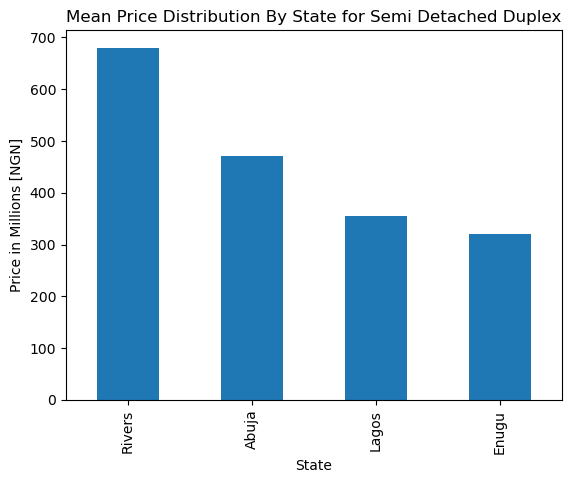

In [27]:
#Visualize the mean price per state for Semi Detached Duplex
mean_price_by_state(SDD);

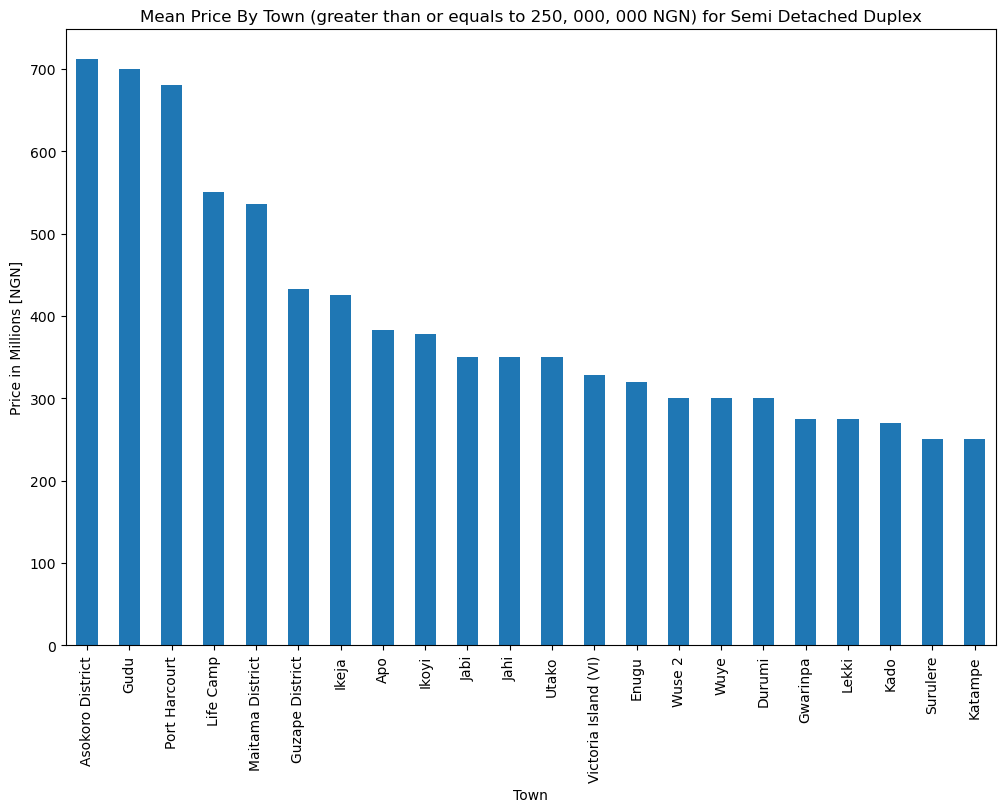

In [28]:
#Visualize the mean price per town for Semi Detached Duplex
mean_price_by_town(SDD);

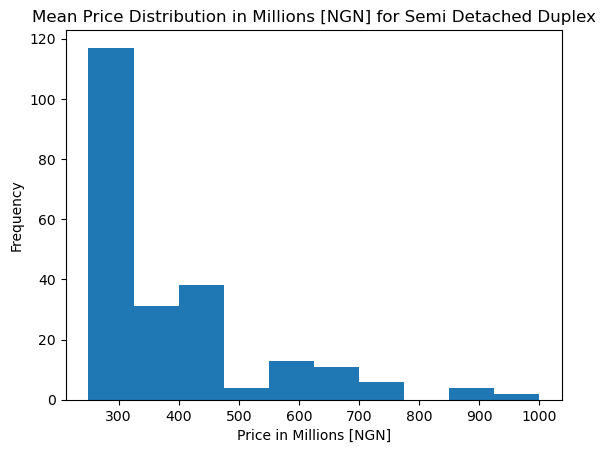

In [29]:
#Visualize the mean price distribution for Semi Detached Duplex
price_distribution(SDD);

In [30]:
#Calculate the correlation between columns in the Semi-Detached Duplex dataset
correl(SDD)

Note: If the correlation between two columns/features in The Semi Detached Duplex Dataset is less than 0.5,
there is a weak correlation between the two columns.


,bedrooms,bathrooms,toilets,parking_space,price__millions
bedrooms,1.000000,0.749742,0.342683,-0.058760,0.008935
bathrooms,0.749742,1.000000,0.470369,0.057994,-0.019758
toilets,0.342683,0.470369,1.000000,0.206978,-0.231639
parking_space,-0.058760,0.057994,0.206978,1.000000,-0.165651
price__millions,0.008935,-0.019758,-0.231639,-0.165651,1.000000


NOTE: The lighter the color, the higher the correlation between two corresponding columns


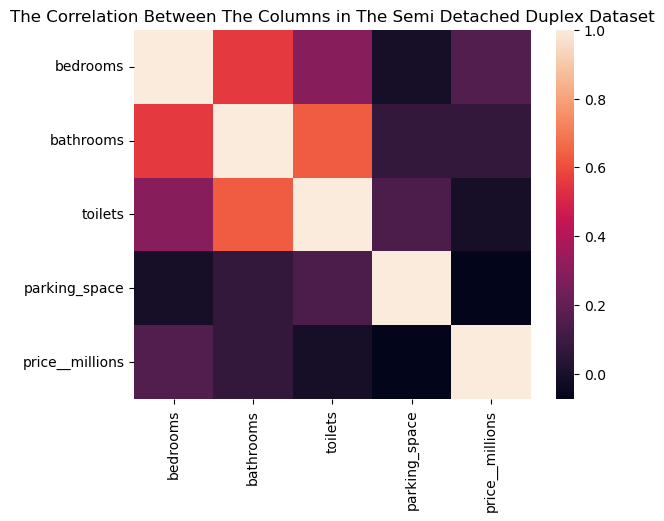

In [31]:
#Visualize the correlation between columns in the Semi-Detached Duplex dataset
correlHeatMap(SDD)

In [32]:
#Extract Detached Bungalow data set into a Data Frame
DB = df[df["title"] == "Detached Bungalow"]

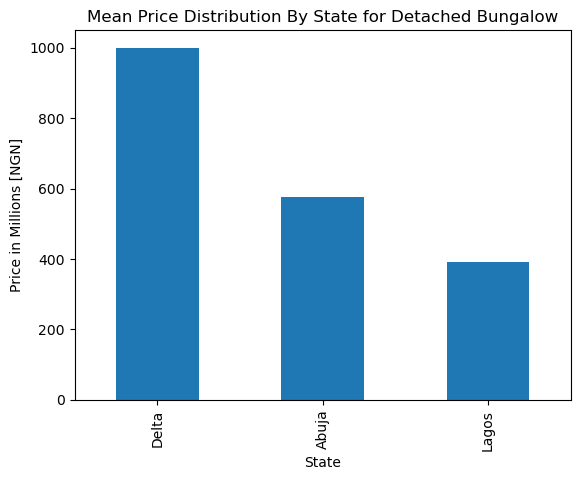

In [33]:
#Visualize the mean price per state for Detached Bungalow
mean_price_by_state(DB);

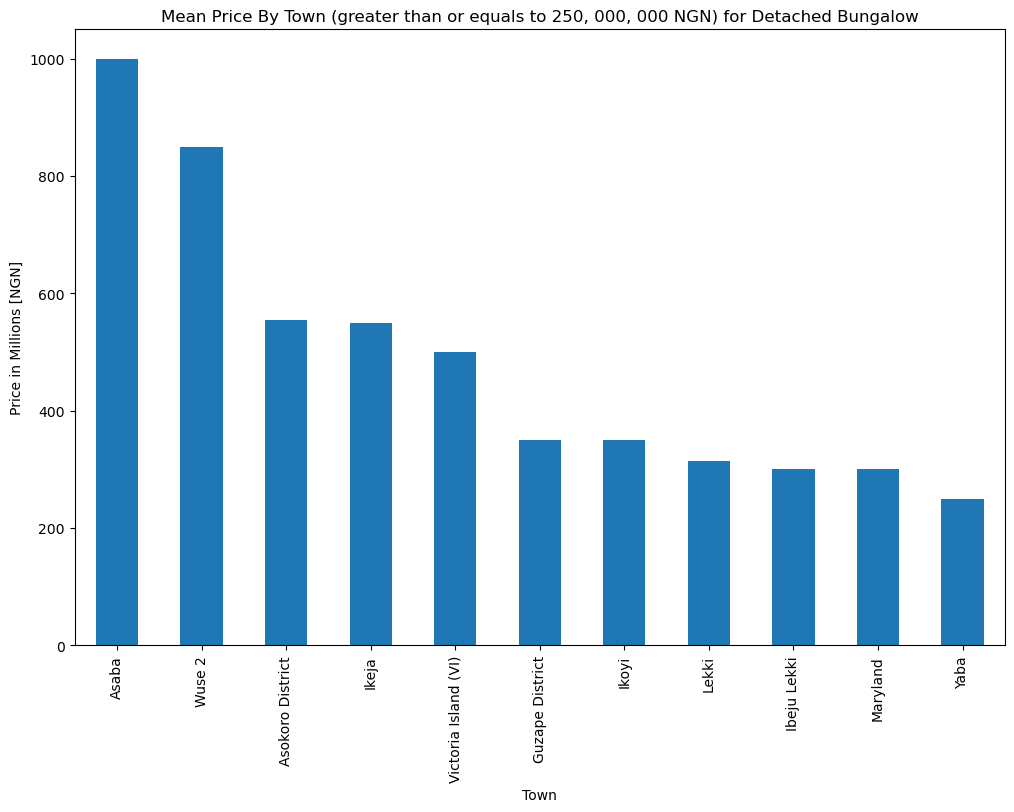

In [34]:
#Visualize the mean price per town for Detached Bungalow
mean_price_by_town(DB);

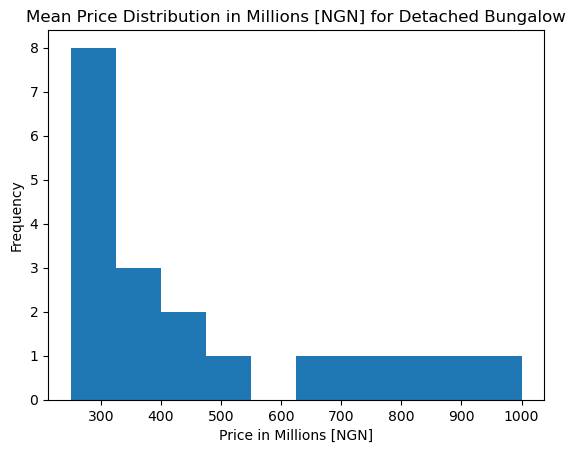

In [35]:
#Visualize the mean price distribution for Detached Bungalow
price_distribution(DB);

In [36]:
#Calculate the correlation between columns in the Detached Bungalow dataset
correl(DB)

Note: If the correlation between two columns/features in The Detached Bungalow Dataset is less than 0.5,
there is a weak correlation between the two columns.


,bedrooms,bathrooms,toilets,parking_space,price__millions
bedrooms,1.000000,0.639879,0.548732,-0.299346,0.293253
bathrooms,0.639879,1.000000,0.717944,-0.465070,-0.036578
toilets,0.548732,0.717944,1.000000,-0.007341,-0.082912
parking_space,-0.299346,-0.465070,-0.007341,1.000000,-0.075521
price__millions,0.293253,-0.036578,-0.082912,-0.075521,1.000000


NOTE: The lighter the color, the higher the correlation between two corresponding columns


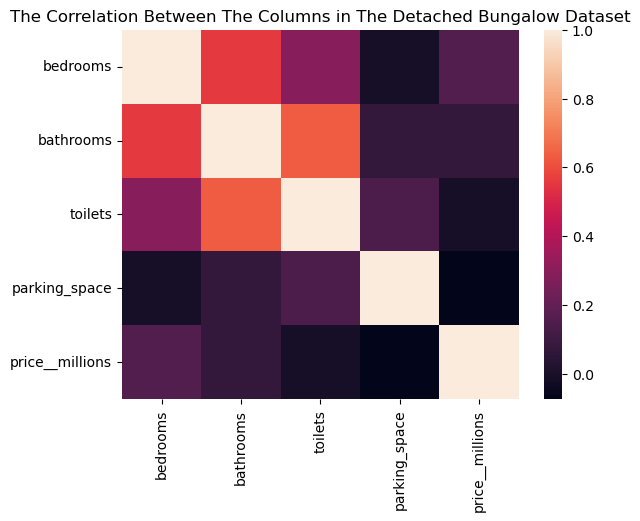

In [37]:
#Visualize the correlation between columns in the Detached Bungalow dataset
correlHeatMap(DB)